<a id='logbook'></a>
# Ship power prediction
Analysis and development of a model to predict ship power.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 462 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file WindowsPath('C:/Users/maa/.matplotlib/stylelib/paper.mplstyle'), line 463 ('figure.dpi       : 100        ## figure dots per inch')


In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)
import sympy as sp

import pandas as pd
import numpy as np

if os.name == 'nt':
    plt.style.use('paper.mplstyle')  # Windows

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.metrics import r2_score
from scipy.integrate import solve_ivp
import seaborn as sns

from copy import deepcopy
import sys
sys.path.append('../../')
from src.notebook_to_latex import Equation, equation_dict
#from src import equations,symbols
import reports.paper_writing
from src.df_to_latex import LateXTable
import src.data.load as load

## Examples:


Duplicate key in file 'paper.mplstyle', line 462 ('figure.figsize   : 5, 3   ## figure size in inches')
Duplicate key in file 'paper.mplstyle', line 463 ('figure.dpi       : 100        ## figure dots per inch')


In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','png')

from IPython.display import HTML, Markdown, Image
from src.df_to_latex import LateXTable

# Abstract
Full-scale measurement data of ship’s propulsion power is analyzed. Various statistics and machine learning models are fitted to predict the propulsion power based on features about the ship operational condition and data about the encountered metocean environments.  

# Introduction

<a id='fig_rolldecay_example>'></a>

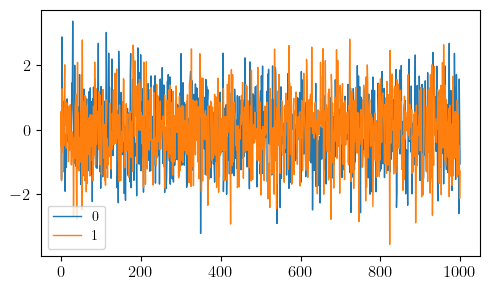

In [4]:
fig,ax=plt.subplots()
df = pd.DataFrame(data=np.random.normal(size=(1000,2)))
df.plot(ax=ax);

The oscillating motion can be described by a spring-mass-damper system as seen in Fig.[(below)](#fig_spring_mass_damper).

This system can me described as the following equation [(below)](#eq_equation1):

<a id="eq_equation1"></a>

In [5]:
eq = r'$E=m \dot c^2 $'
Equation(eq, label='equation1')

<src.notebook_to_latex.Equation object>

In [6]:
A,r = sp.symbols('A r')
eq = sp.Eq(A,
          r**2*sp.pi)
Equation(eq, label='equation2')

<src.notebook_to_latex.Equation object>

# Data
The data used in this study is described in Tab.[(below)](#fig_data_description).

<a id="fig_data_description"></a>

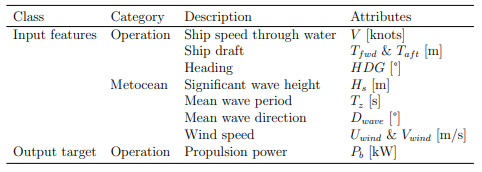

In [7]:
Image('../figures/data_description.PNG')

## Exploratory data analysis
The ship speed $V$, ship draughts $T_{aft}$ and $T_{fwd}$ were all negative in the raw data file. This was imidiatelly corrected, to be more in line with what would be expected from a more general sign convention.

In [17]:
raw_data = load.raw()

In [18]:
display(raw_data.head())
display(raw_data.describe())
display(raw_data.dtypes)

,Power,V,T_fwd,T_aft,HDG,Hs,Tz,D_wave,U_wind,V_wind
0,4096.859211,23.359333,10.25,10.2,225.120423,0.336355,4.113880,58.287071,-0.251960,0.598855
1,4062.904838,23.351923,10.25,10.2,225.121609,0.334025,4.107303,61.219389,-0.205543,0.537524
2,4105.640943,23.304333,10.25,10.2,213.803859,0.331768,4.100033,64.378446,-0.167395,0.480271
3,4156.401020,23.293167,10.25,10.2,225.124531,0.328743,4.084423,69.095584,-0.153352,0.410798
4,4147.498244,23.287000,10.25,10.2,225.125682,0.326883,4.072262,73.970302,-0.125637,0.360612


,Power,V,T_fwd,T_aft,HDG,Hs,Tz,D_wave,U_wind,V_wind
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,3188.935287,24.278879,11.182685,11.093998,254.571157,1.666358,7.462152,204.735041,2.035780,0.747150
std,1332.289539,1.001131,0.715500,0.701950,70.481649,0.813212,1.955307,80.514470,4.931660,4.261370
min,1000.000000,22.436267,10.250000,10.160000,0.000000,0.158431,2.233657,2.680181,-11.236499,-14.531855
25%,1815.723938,23.454343,10.700000,10.600000,245.028127,1.153389,6.396379,169.396098,-0.985087,-2.065295
50%,3173.939254,24.132437,11.000000,10.800000,270.018724,1.540236,7.497403,205.961881,2.740314,0.088762
75%,4385.159249,24.897164,11.700000,11.600000,292.405334,2.160576,8.980331,268.427660,5.574664,3.568319
max,5974.050320,27.955649,12.400000,12.200000,347.212496,4.330742,11.513423,358.097469,13.623467,12.415640


Power     float64
V         float64
T_fwd     float64
T_aft     float64
HDG       float64
Hs        float64
Tz        float64
D_wave    float64
U_wind    float64
V_wind    float64
dtype: object

# Analysis

# Conclusions
  




# References
<div class="cite2c-biblio"></div>